In [6]:
##importar paquetes
import pandas as pd
import numpy as np
import random

In [7]:
#importar datos 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# cargar bases
cronicos= pd.read_csv('/content/drive/MyDrive/ANALITICA3/RETO_df_cronicos.csv', sep=",")
egresos= pd.read_csv('/content/drive/MyDrive/ANALITICA3/RETO_df_egresos.csv', sep=",")
usuarios= pd.read_csv('/content/drive/MyDrive/ANALITICA3/RETO_df_usuarios.csv', sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (34,36,39,40,50,52,55,56,58,62,64,65,66,75,107,108,111,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/

In [9]:
cronicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38736 entries, 0 to 38735
Columns: 290 entries, YEAR to NombreDiagnostico83
dtypes: float64(39), int64(10), object(241)
memory usage: 85.7+ MB


In [10]:
egresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   YEAR                               6376 non-null   int64  
 1   MES                                6376 non-null   object 
 2   NRO ATENCION                       6376 non-null   int64  
 3   NRO INGRESO                        6376 non-null   int64  
 4   SERVICIO HABILITADO COD            6376 non-null   float64
 5   SERVICIO HABILITADO                6376 non-null   object 
 6   TIPO IDENTIFICACION                6376 non-null   object 
 7   NRODOC                             6376 non-null   int64  
 8   FECHA NACIMIENTO                   6376 non-null   object 
 9   REGIMEN AFILIACION                 6376 non-null   object 
 10  EPS VALIDADA                       4103 non-null   object 
 11  MODALIDAD CONTRATO                 6376 non-null   objec

In [11]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183911 entries, 0 to 183910
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MES                            183911 non-null  object 
 1   YEAR                           183911 non-null  int64  
 2   NRODOC                         183911 non-null  int64  
 3   SEXO                           183901 non-null  object 
 4   FECHA NACIMIENTO               111831 non-null  object 
 5   EDAD                           149755 non-null  float64
 6   DEPARTAMENTO                   82284 non-null   object 
 7   MUNICIPIO                      81397 non-null   object 
 8   BARRIO                         115344 non-null  object 
 9   FECHA INICIO AL PGP            125658 non-null  object 
 10  FECHA PRIMERA CLASE FUNCIONAL  87961 non-null   object 
 11  PRIMERA CLASE FUNCIONAL        89641 non-null   object 
 12  FECHA ÚLTIMA CLASE FUNCIONAL  

In [12]:
#se separan las bases de datos según los años antes y despues de la pandemia
cronicospos = cronicos[(cronicos['YEAR']> 2018)]
cronicospre = cronicos[(cronicos['YEAR']<= 2018)]
egresospos=egresos[(egresos['YEAR']> 2018)]
egresospre=egresos[(egresos['YEAR']<= 2018)]
usuariospos=usuarios[(usuarios['YEAR']> 2018)]
usuariospre=usuarios[(usuarios['YEAR']<= 2018)]

**TRATAMIENTO DE BASES DESPUÉS DE PANDEMIA**

In [13]:
cronicospre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12827 entries, 0 to 12826
Columns: 290 entries, YEAR to NombreDiagnostico83
dtypes: float64(39), int64(10), object(241)
memory usage: 28.5+ MB


In [14]:
cronicospre.head(50)

,YEAR,MES,Fecha diligenciamiento,Hora,Atención,Ingreso,Tipo,NRODOC,Peso,Talla,...,Diagnostico79,NombreDiagnostico79,Diagnostico80,NombreDiagnostico80,Diagnostico81,NombreDiagnostico81,Diagnostico82,NombreDiagnostico82,Diagnostico83,NombreDiagnostico83
0,2017,OCTUBRE,2017-10-02,9:00:20 a. m.,3912499,2629714,CC,311144,69.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,OCTUBRE,2017-10-02,9:04:33 a. m.,3942247,2629726,CC,308418,62.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,OCTUBRE,2017-10-02,9:11:43 a. m.,3898560,2629751,CC,308573,89.0,163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,OCTUBRE,2017-10-02,9:33:34 a. m.,3912599,2629828,CC,307549,88.0,163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,OCTUBRE,2017-10-02,9:43:59 a. m.,3906820,2629717,CC,307044,58.0,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017,OCTUBRE,2017-10-02,9:51:22 a. m.,3935619,2629892,CC,309419,53.0,146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,OCTUBRE,2017-10-02,9:59:17 a. m.,3941021,2629907,CC,308437,43.0,139.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017,OCTUBRE,2017-10-11,3:27:42 p. m.,3952389,2640869,CC,308437,43.0,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017,OCTUBRE,2017-10-02,10:19:11 a. m.,3912623,2629716,CC,308637,55.0,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017,OCTUBRE,2017-10-02,10:23:56 a. m.,3897898,2629989,CC,308561,71.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cronicospre.columns

Index(['YEAR', 'MES', 'Fecha diligenciamiento', 'Hora', 'Atención', 'Ingreso',
       'Tipo', 'NRODOC', 'Peso', 'Talla',
       ...
       'Diagnostico79', 'NombreDiagnostico79', 'Diagnostico80',
       'NombreDiagnostico80', 'Diagnostico81', 'NombreDiagnostico81',
       'Diagnostico82', 'NombreDiagnostico82', 'Diagnostico83',
       'NombreDiagnostico83'],
      dtype='object', length=290)

In [16]:
#Se pasan todas las columnas a minusculas para ser tratadas más facil
cronicospre.columns = cronicospos.columns.str.lower()

In [17]:
#Porcentaje de representación de datos nulos en la base cronicospos
print(round(cronicospre.isnull().sum().sum()/cronicospre.size, 2)*100, "%")

70.0 %


In [18]:
#Se evalua el porcentaje de nulos por columna
((cronicospre.isnull().sum() / len(cronicospre))*100).sort_values(ascending = False)

nombrediagnostico12                       100.0
diagnostico13                             100.0
diagnostico38                             100.0
nombrediagnostico37                       100.0
diagnostico37                             100.0
                                          ...  
calificación velocidad                      0.0
velocidad (m/s)                             0.0
tiempo en segundos (recorrer 5 metros)      0.0
calificación (apoyo monopodal)              0.0
year                                        0.0
Length: 290, dtype: float64

In [19]:
#Se eliminan aquellas columnas en las que el porcentaje de nulos sea mayor al 60%
lista=cronicospre.columns

In [20]:
for i in lista:
  if (cronicospre[i].isnull().sum() / len(cronicospre))*100> 60 :
    cronicospre=cronicospre.drop([i], axis=1)


In [21]:
#La base queda con 97 columnas de 290
cronicospre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12827 entries, 0 to 12826
Data columns (total 88 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       12827 non-null  int64  
 1   mes                                        12827 non-null  object 
 2   fecha diligenciamiento                     12827 non-null  object 
 3   hora                                       12827 non-null  object 
 4   atención                                   12827 non-null  int64  
 5   ingreso                                    12827 non-null  int64  
 6   tipo                                       12827 non-null  object 
 7   nrodoc                                     12827 non-null  int64  
 8   peso                                       12827 non-null  float64
 9   talla                                      12827 non-null  float64
 10  imc                   

In [22]:
#Variables sin nulos
lista=cronicospre.columns
cont=0
for i in lista:
  if cronicospre[i].isnull().sum()<=0:
    print(i)
    ("--------------------------------------")

year
mes
fecha diligenciamiento
hora
atención
ingreso
tipo
nrodoc
peso
talla
imc
clasificación imc
perímetro muslo
perímetro cintura
pliegue triceps
pliegue abdomen
pliegue muslo
sumatoria pliegues
presión arterial sistólica
presión arterial diastólica
frecuencia cardíaca en reposo
auto-calificacion nivel de ejercicio
constantes
mets -índice metabólico
vo2 - máxima cantidad de oxígeno
calificación (índice de fragilidad)
tiempo en segundos (apoyo monopodal)
calificación (apoyo monopodal)
tiempo en segundos (recorrer 5 metros)
velocidad (m/s)
calificación velocidad
tipo diabetes mellitus
es insulinorequiriente
tiempo con el diagnóstico
fecha glicemia
fecha hemoglobina glicosilada
tiempo con el diagnóstico1
cuantos cigarrillos día
fecha ldl
fecha hdl
fecha colesterol total
fecha trigliceridos
fecha creatinina1
fecha microalbuminuria
fecha creatinina2
tiene próximo control
tipo control
requiere cita de morbilidad
fecha cita morbilidad
ambito según el médico


In [23]:
#Se eliminan aquellas que no aportan al modelo o que otra columna contenga el mismo dato pero en un tipo diferente
lista= (['fecha diligenciamiento', 'hora', 'atención', 'ingreso', 'tipo', 'perímetro muslo', 'perímetro cintura',
       'pliegue triceps', 'pliegue abdomen', 'pliegue muslo', 'constantes', 'tiempo en segundos (apoyo monopodal)', 'tiempo en segundos (recorrer 5 metros)', 'velocidad (m/s)' ])

In [24]:
for i in lista:
  cronicospre=cronicospre.drop([i], axis=1)

In [25]:
#Variables con nulos
lista=cronicospre.columns
cont=0
for i in lista:
  if cronicospre[i].isnull().sum()>0:
    print(i)
    cont=cont+1
    ("--------------------------------------")
print(cont)

saturación de oxígeno (%)
índice de fragilidad groningen
test findrisc
diabetes mellitus
glicemia
hemoglobina glicada
control diabetes
tiene riesgo de tener diabetes mellitus
tiene hta
tiene epoc
epoc (clasificación bodex)
enfermedad coronaria (en el último año)
insuficiencia cardíaca
valvulopatía
arritmia o paciente con dispositivo
sufre de alguna enfermedad cardiovascular
¿cuál?
tabaquismo
lipoproteina
hdl
colesterol total
trigliceridos
creatinina 1 consulta
tasa de filtración glomerular tfg
estadio de la enfermedad renal
microalbuminuria
hormona estimulante de la tiroides (tsh)
clase funcional
creatinina 2 consulta
tasa de filtración glomerular tfg2
meses de diferencia entre tfg
cambio de tfg
clasificación cambio de tfg
úlcera de pie diabético
remisión
diagnóstico principal
análisis y conducta a seguir
fecha próximo control
38


In [26]:
# Se dividen estas variables con nulos en 3 grupos, las que no aportan al modelo, las que su cantidad de nulos es dificil de reemplazar, aquellas que pueden hacer parte del modelo
# Se evalua cada columna

In [27]:
lista2=cronicospre.columns

In [28]:
#se revisa cada variable
for i in lista2:
  print(i)
  print(cronicospre[i].isnull().sum())
  print('------------------------------------------------')

year
0
------------------------------------------------
mes
0
------------------------------------------------
nrodoc
0
------------------------------------------------
peso
0
------------------------------------------------
talla
0
------------------------------------------------
imc
0
------------------------------------------------
clasificación imc
0
------------------------------------------------
saturación de oxígeno (%)
24
------------------------------------------------
sumatoria pliegues
0
------------------------------------------------
presión arterial sistólica
0
------------------------------------------------
presión arterial diastólica
0
------------------------------------------------
frecuencia cardíaca en reposo
0
------------------------------------------------
auto-calificacion nivel de ejercicio
0
------------------------------------------------
mets -índice metabólico
0
------------------------------------------------
vo2 - máxima cantidad de oxígeno
0
----------

In [29]:
cronicospre['clasificación cambio de tfg'].unique()

array([nan, 'Envejecimiento', 'Deterioro', '0 cero'], dtype=object)

In [30]:
#índice tobillo/brazo, observaciones,presión arterial registro medico,basciloscopia, diagnostico1, nombrediagnostico1, diagnostico2, nombrediagnostico2, diagnostico3, nombrediagnostico3= no esta en esa base

In [31]:
listal= (['test findrisc', 'tiempo con el diagnóstico', '¿cuál?', 'fecha ldl', 'fecha colesterol total', 'fecha trigliceridos', 'fecha creatinina1', 'fecha microalbuminuria','imc',
'fecha creatinina2', 'úlcera de pie diabético', 'fecha próximo control', 'fecha hdl', 'clasificación cambio de tfg', 'tiene riesgo de tener diabetes mellitus', 'estadio de la enfermedad renal'])

In [32]:
#borrar
for i in listal:
  cronicospre=cronicospre.drop([i], axis=1)

In [33]:
cronicospre.isnull().sum()

year                                            0
mes                                             0
nrodoc                                          0
peso                                            0
talla                                           0
clasificación imc                               0
saturación de oxígeno (%)                      24
sumatoria pliegues                              0
presión arterial sistólica                      0
presión arterial diastólica                     0
frecuencia cardíaca en reposo                   0
auto-calificacion nivel de ejercicio            0
mets -índice metabólico                         0
vo2 - máxima cantidad de oxígeno                0
índice de fragilidad groningen                 45
calificación (índice de fragilidad)             0
calificación (apoyo monopodal)                  0
calificación velocidad                          0
diabetes mellitus                             268
tipo diabetes mellitus                          0


Al hacer la revisión de cada columna se nota que la mayoria tienen 504 y 268 nulos, por lo que se obtara por borrar esas filas y no las columnas debido a que estas no estan aportando al modelo pues todas sus columnas tienen Nulos

In [34]:
#Se reemplazan los nulos y luego se borran las columnas 
cronicospre['diagnóstico principal']=cronicospre['diagnóstico principal'].fillna(0)

In [35]:
cronicospre = cronicospre.drop(cronicospre[cronicospre['diagnóstico principal']==0].index)
cronicospre.isnull().sum()

year                                           0
mes                                            0
nrodoc                                         0
peso                                           0
talla                                          0
clasificación imc                              0
saturación de oxígeno (%)                     21
sumatoria pliegues                             0
presión arterial sistólica                     0
presión arterial diastólica                    0
frecuencia cardíaca en reposo                  0
auto-calificacion nivel de ejercicio           0
mets -índice metabólico                        0
vo2 - máxima cantidad de oxígeno               0
índice de fragilidad groningen                40
calificación (índice de fragilidad)            0
calificación (apoyo monopodal)                 0
calificación velocidad                         0
diabetes mellitus                              0
tipo diabetes mellitus                         0
es insulinorequirien

In [36]:
#debido al tipo de dato que representa la saturación de oxigeno de la persona, se decide eliminar esta columna pues sus nulos no pueden ser reemplazados
cronicospre=cronicospre.drop(['saturación de oxígeno (%)'], axis=1)

In [37]:
cronicospre['diagnóstico principal'].isnull().sum()

0

In [38]:
#Se reemplazan los nulos y luego se borran las columnas 
cronicospre['hemoglobina glicada']=cronicospre['hemoglobina glicada'].fillna(0)

In [39]:
cronicospre = cronicospre.drop(cronicospre[cronicospre['hemoglobina glicada']==0].index)

In [40]:
lista3=cronicospre.columns

In [41]:
#se revisa cada variable
for i in lista3:
  print(i)
  print(cronicospre[i].isnull().sum())
  print('------------------------------------------------')

year
0
------------------------------------------------
mes
0
------------------------------------------------
nrodoc
0
------------------------------------------------
peso
0
------------------------------------------------
talla
0
------------------------------------------------
clasificación imc
0
------------------------------------------------
sumatoria pliegues
0
------------------------------------------------
presión arterial sistólica
0
------------------------------------------------
presión arterial diastólica
0
------------------------------------------------
frecuencia cardíaca en reposo
0
------------------------------------------------
auto-calificacion nivel de ejercicio
0
------------------------------------------------
mets -índice metabólico
0
------------------------------------------------
vo2 - máxima cantidad de oxígeno
0
------------------------------------------------
índice de fragilidad groningen
9
------------------------------------------------
calificación

In [42]:
cronicospre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7720 entries, 0 to 12826
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       7720 non-null   int64  
 1   mes                                        7720 non-null   object 
 2   nrodoc                                     7720 non-null   int64  
 3   peso                                       7720 non-null   float64
 4   talla                                      7720 non-null   float64
 5   clasificación imc                          7720 non-null   object 
 6   sumatoria pliegues                         7720 non-null   float64
 7   presión arterial sistólica                 7720 non-null   int64  
 8   presión arterial diastólica                7720 non-null   int64  
 9   frecuencia cardíaca en reposo              7720 non-null   int64  
 10  auto-calificacion nivel

In [43]:
#Se miran si existen varios diagnosticos para una persona
df=pd.DataFrame()
df['numero_de_diagnosticos']= cronicospre['nrodoc'].value_counts()
df['nrodoc']= cronicospre['nrodoc'].value_counts().index
df=df.reset_index().drop('index', axis=1)
df

,numero_de_diagnosticos,nrodoc
0,10,310577
1,9,307533
2,9,308615
3,9,309107
4,9,310396
...,...,...
2259,1,310805
2260,1,306841
2261,1,306816
2262,1,310248


Base Egresos

In [44]:
#Se eliminan los diagnosticos más antiguos y se deja el más reciente unicamente
def funcion_1(base):
  dft = base.copy(deep=True)
  lista= list(df['nrodoc'])
  len(lista)
  dft2=pd.DataFrame()
  for i in lista:
    dft3=dft[dft['nrodoc']==i].reset_index()
    if dft3.shape[0] > 1 :
      for j in range(0, dft3.shape[0] -1):
        dft3.drop(j, axis=0, inplace= True)
      dft2= dft2.append(dft3, ignore_index=True)
    else:
      dft2=dft2.append(dft3, ignore_index=True)
  return dft2

In [45]:
cronicospref= funcion_1(cronicospre)

In [46]:
#Se rectifica que haya quedado una columna por id
df=pd.DataFrame()
df['numero_de_diagnosticos']= cronicospref['nrodoc'].value_counts()
df['nrodoc']= cronicospref['nrodoc'].value_counts().index
df=df.reset_index().drop('index', axis=1)
df

,numero_de_diagnosticos,nrodoc
0,1,310577
1,1,308579
2,1,307148
3,1,309228
4,1,311387
...,...,...
2259,1,311535
2260,1,307179
2261,1,306300
2262,1,311418


In [47]:
cronicospref.head(2)

,index,year,mes,nrodoc,peso,talla,clasificación imc,sumatoria pliegues,presión arterial sistólica,presión arterial diastólica,...,meses de diferencia entre tfg,cambio de tfg,remisión,diagnóstico principal,análisis y conducta a seguir,tiene próximo control,tipo control,requiere cita de morbilidad,fecha cita morbilidad,ambito según el médico
0,11218,2018,NOVIEMBRE,310577,59.0,138.0,Obesidad Grasa,66.0,145,69,...,4.0,0.0,Grupal 2,E108 - DIABETES MELLITUS INSULINODEPENDIENTE C...,pacienet de 72 años de edad con antecedentes d...,ND,Sin dato,ND,ND,Ambulatorio
1,12312,2018,DICIEMBRE,307533,89.0,151.0,Obesidad Grasa,116.0,102,60,...,4.0,0.0,Grupal 2,E107 - DIABETES MELLITUS INSULINODEPENDIENTE C...,"Paciente de 80 años, con antecedentes de: HTA,...",ND,Sin dato,ND,ND,Ambulatorio


In [48]:
#se elimina columna adicional
cronicospref=cronicospref.drop(['index'], axis=1)

In [49]:
#Se pone los datos en un mejor tipo
cronicospref.convert_dtypes().dtypes

year                                           Int64
mes                                           string
nrodoc                                         Int64
peso                                         Float64
talla                                          Int64
clasificación imc                             string
sumatoria pliegues                             Int64
presión arterial sistólica                     Int64
presión arterial diastólica                    Int64
frecuencia cardíaca en reposo                  Int64
auto-calificacion nivel de ejercicio           Int64
mets -índice metabólico                      Float64
vo2 - máxima cantidad de oxígeno             Float64
índice de fragilidad groningen                 Int64
calificación (índice de fragilidad)           string
calificación (apoyo monopodal)                string
calificación velocidad                        string
diabetes mellitus                             string
tipo diabetes mellitus                        

In [50]:
#Se eliminan las columnas que tengan muchos datos string unicos debido a que son dificiles de tratar para modelos de regresión
lista=cronicospref.columns

In [51]:
for i in lista:
  print(i)
  print(cronicospref[i].unique())
  ('----------------------------------------')

year
[2018 2017]
mes
['NOVIEMBRE' 'DICIEMBRE' 'OCTUBRE' 'SEPTIEMBRE' 'JULIO' 'AGOSTO' 'JUNIO'
 'MAYO' 'ENERO' 'FEBRERO' 'MARZO']
nrodoc
[310577 307533 308615 ... 306816 310248 312371]
peso
[ 59.   89.   67.   45.   62.   53.   80.   64.   87.   68.   72.   93.
  82.   58.   55.   65.   83.   79.   74.   78.   52.   96.   88.   66.
  84.   71.   54.   70.   81.   76.   57.   92.   75.   56.  115.    6.
  85.   60.   86.   51.   69.   63.   61.   95.   73.  118.  104.   90.
  47.  110.   99.   49.  109.  112.   48.   98.   91.   97.   94.  106.
  50.  122.   43.  102.  124.  125.   39.   77.   46.  121.   37.   40.
  42.  108.   41.  101.  120.   44.  111.   38.  114.  113.  117.  105.
 103.   34.    0.  128.  100.   35.   33.  127.   87.3  30. ]
talla
[1.3800e+02 1.5100e+02 1.6800e+02 1.4600e+02 1.5200e+02 1.5700e+02
 1.5400e+02 1.4500e+02 1.4800e+02 1.5600e+02 1.6400e+02 1.7400e+02
 1.5800e+02 1.6300e+02 1.5000e+02 1.3900e+02 1.4100e+02 1.6600e+02
 1.5900e+02 1.6000e+02 1.5500e+02 1.71

EGRESOSPRE

In [52]:
egresospre.columns

Index(['YEAR', 'MES', 'NRO ATENCION', 'NRO INGRESO', 'SERVICIO HABILITADO COD',
       'SERVICIO HABILITADO', 'TIPO IDENTIFICACION', 'NRODOC',
       'FECHA NACIMIENTO', 'REGIMEN AFILIACION', 'EPS VALIDADA',
       'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2',
       'SERVICIO ADMITE', 'BLOQUE ANTERIOR', 'PISO ANTERIOR',
       'SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE',
       'UNIDAD ESTRATEGICA', 'PISO', 'NRO CAMA', 'SERVICIO EGRESO',
       'TIPO EGRESO', 'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO',
       'FECHA POSIBLE ALTA', 'FECHA ALTA MEDICA', 'FECHA RECAUDO',
       'FECHA CAMILLERO', 'FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA',
       'FECHA FARMACIA', 'FECHA SALIDA', 'FECHA ASEO',
       'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO',
       'ALTA MEDICA', 'POSIBLE ALTA', 'DXPRINCIPAL EGRESO COD',
       'DXPRINCIPAL EGRESO', 'DX 

In [53]:
egresospre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4775 entries, 0 to 6373
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   YEAR                               4775 non-null   int64  
 1   MES                                4775 non-null   object 
 2   NRO ATENCION                       4775 non-null   int64  
 3   NRO INGRESO                        4775 non-null   int64  
 4   SERVICIO HABILITADO COD            4775 non-null   float64
 5   SERVICIO HABILITADO                4775 non-null   object 
 6   TIPO IDENTIFICACION                4775 non-null   object 
 7   NRODOC                             4775 non-null   int64  
 8   FECHA NACIMIENTO                   4775 non-null   object 
 9   REGIMEN AFILIACION                 4775 non-null   object 
 10  EPS VALIDADA                       2502 non-null   object 
 11  MODALIDAD CONTRATO                 4775 non-null   objec

In [54]:
#Porcentaje de representación de datos nulos en la base egresospos
print(round(egresospre.isnull().sum().sum()/egresospre.size, 2)*100, "%")

18.0 %


In [55]:
#Se evalua el porcentaje de nulos por columna
((egresospre.isnull().sum() / len(egresospre))*100).sort_values(ascending = False)

FECHA ENFERMERIA                100.000000
FECHA RECAUDO                   100.000000
FECHA POSIBLE ALTA               99.162304
CAUSA BASICA CAPITULO COD        92.544503
CAUSA BASICA CATEGORIA COD       92.544503
                                   ...    
SERVICIO EGRESO                   0.000000
TIPO EGRESO                       0.000000
FECHA ALTA MEDICA                 0.000000
MES                               0.000000
PROFESIONAL ESPECIALIDAD GRD      0.000000
Length: 66, dtype: float64

In [56]:
#se eliminan aquellas columnas que tengan más de 60% de sus datos nulos
lista=egresospos.columns

In [57]:
for i in lista:
  if (egresospre[i].isnull().sum() / len(egresospre))*100> 60 :
    egresospre=egresospre.drop([i], axis=1)

In [58]:
#Variables con nulos
lista=egresospre.columns
cont=0
for i in lista:
  if egresospre[i].isnull().sum()>0:
    print(i)
    ("--------------------------------------")

EPS VALIDADA
FECHA INGRESO CLINICA
FECHA INGRESO SERVICIO
DX RELACIONADO1 COD
DX RELACIONADO2 COD
DX RELACIONADO3 COD
DX PRINCIPAL EGRESO CATEGORIA COD
DX PRINCIPAL EGRESO CAPITULO COD


In [59]:
egresospre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4775 entries, 0 to 6373
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   YEAR                               4775 non-null   int64  
 1   MES                                4775 non-null   object 
 2   NRO ATENCION                       4775 non-null   int64  
 3   NRO INGRESO                        4775 non-null   int64  
 4   SERVICIO HABILITADO COD            4775 non-null   float64
 5   SERVICIO HABILITADO                4775 non-null   object 
 6   TIPO IDENTIFICACION                4775 non-null   object 
 7   NRODOC                             4775 non-null   int64  
 8   FECHA NACIMIENTO                   4775 non-null   object 
 9   REGIMEN AFILIACION                 4775 non-null   object 
 10  EPS VALIDADA                       2502 non-null   object 
 11  MODALIDAD CONTRATO                 4775 non-null   objec

In [60]:
#validación de valor agregado de los datos
egresospre['CAUSA BASICA MUERTE'].unique()

array(['Sin informacion en base de datos',
       'NEUMONIA BACTERIANA  NO ESPECIFICADA',
       'SEPTICEMIA  NO ESPECIFICADA ',
       'ENFERMEDAD DIVERTICULAR DEL INTESTINO GRUESO CON PERFORACION Y ABSCESO',
       'ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EXACERBACION AGUDA  NO ESPECIFICADA',
       'OTRAS CAIDAS EN EL MISMO NIVEL  INSTITUCION RESIDENCIAL',
       'RUPTURA DE ANEURISMA DE LA AORTA TORACICA', 'COLECISTITIS AGUDA ',
       'ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON INFECCION AGUDA DE LAS VIAS RESPIRATORIAS INFERIORES',
       'CALCULO DE CONDUCTO BILIAR CON COLECISTITIS ',
       'INSUFICIENCIA RESPIRATORIA AGUDA ',
       'NEUMONITIS DEBIDA A ASPIRACION DE ALIMENTO O VOMITO',
       'ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIENCIA CARDIACA (CONGESTIVA) ',
       'INFECCION DE VIAS URINARIAS  SITIO NO ESPECIFICADO ',
       'CHOQUE CARDIOGENICO',
       'TUMOR MALIGNO DEL ESOFAGO  PARTE NO ESPECIFICADA',
       'ENFERMEDAD CARDIORRENAL HIPERTENSIVA CON INSUFIC

In [61]:
listae =(['DX RELACIONADO1 COD', 'DX RELACIONADO2 COD', 'DX RELACIONADO3 COD', 'DX PRINCIPAL EGRESO CATEGORIA COD', 'DX PRINCIPAL EGRESO CAPITULO COD'])
#'FECHA RECAUDO', 'FECHA CAMILLERO', 'FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA', 'FECHA FARMACIA', 'FECHA ASEO',

In [62]:
#borrar
for i in listae:
  egresospre=egresospre.drop([i], axis=1)

In [63]:
egresospre.isnull().sum()

YEAR                                0
MES                                 0
NRO ATENCION                        0
NRO INGRESO                         0
SERVICIO HABILITADO COD             0
SERVICIO HABILITADO                 0
TIPO IDENTIFICACION                 0
NRODOC                              0
FECHA NACIMIENTO                    0
REGIMEN AFILIACION                  0
EPS VALIDADA                     2273
MODALIDAD CONTRATO                  0
FUENTE FINANCIACION1                0
FUENTE FINANCIACION2                0
SERVICIO ADMITE                     0
BLOQUE ANTERIOR                     0
PISO ANTERIOR                       0
SERVICIO ANTERIOR                   0
NRO CAMA ANTERIOR                   0
VIA INGRESO                         0
BLOQUE                              0
UNIDAD ESTRATEGICA                  0
PISO                                0
NRO CAMA                            0
SERVICIO EGRESO                     0
TIPO EGRESO                         0
FECHA INGRES

In [64]:
#Se eliminan aquellos que no agregan valor
listaef =(['NRO ATENCION', 'NRO INGRESO', 'SERVICIO HABILITADO COD',
       'SERVICIO HABILITADO', 'TIPO IDENTIFICACION','FECHA NACIMIENTO','REGIMEN AFILIACION', 'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2',
       'SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE','UNIDAD ESTRATEGICA', 'PISO', 'NRO CAMA', 'SERVICIO EGRESO', 'FECHA INGRESO SERVICIO',
       'FECHA ALTA MEDICA',  'FECHA SALIDA','DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO', 'TRANSFUSION SANGRE', 'ANTIBIOTICO','ALTA MEDICA', 'POSIBLE ALTA', 'DXPRINCIPAL EGRESO COD',
       'DXPRINCIPAL EGRESO', 'DX RELACIONADO1', 'DX RELACIONADO2', 'TIPO DIAGNOSTICO PRINCIPAL',
       'DX PRINCIPAL EGRESO CATEGORIA', 'DX PRINCIPAL EGRESO CAPITULO',
       'CAUSA BASICA CATEGORIA',
       'CAUSA BASICA CAPITULO','DEMORA SALIDA CLINICA (DIAS)', 'YEAR', 'MES', 'BLOQUE ANTERIOR', 'PISO ANTERIOR', 'PROFESIONAL ESPECIALIDAD', 'FECHA INGRESO CLINICA'])

In [65]:
#borrar
for i in listaef:
  egresospre=egresospre.drop([i], axis=1)

In [66]:
#se ponen todas las columnas en minusculas
egresospre.columns = egresospre.columns.str.lower()

In [67]:
df=pd.DataFrame()
df['numero_de_hospitalizaciones']= egresospre['nrodoc'].value_counts()
df['nrodoc']= egresospre['nrodoc'].value_counts().index
df=df.reset_index().drop('index', axis=1)
df

,numero_de_hospitalizaciones,nrodoc
0,17,309930
1,16,309306
2,16,310557
3,15,308373
4,14,309776
...,...,...
2453,1,311419
2454,1,308066
2455,1,311992
2456,1,308050


In [68]:
egresospref= funcion_1(egresospre)

In [69]:
egresospref

,index,nrodoc,eps validada,servicio admite,tipo egreso,dx relacionado3,causa basica muerte,profesional especialidad grd
0,3769,309930,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,ENFISEMA CENTROLOBULAR,Sin informacion en base de datos,Infectologia
1,1217,309306,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,VÁRICES ESOFAGICAS SIN HEMORRAGIA EN ENFERMEDA...,Sin informacion en base de datos,Medicina Interna
2,2678,310557,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,CARDIOMEGALIA,Sin informacion en base de datos,Medicina Interna
3,470,308373,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,OTROS TRASTORNOS DEL ALMACENAMIENTO DE LIPIDOS,Sin informacion en base de datos,Medicina Interna
4,4537,309776,NUEVA EPS S.A. PGP,Ambulatoria Personal,Alta Médica,Sin informacion en base de datos,Sin informacion en base de datos,Neurologia
...,...,...,...,...,...,...,...,...
2453,2796,311419,NUEVA EPS S.A. PGP,Urgencias Maternas,Alta Médica,DERRAME PERICARDICO (NO INFLAMATORIO),Sin informacion en base de datos,Medicina Interna
2454,2784,308066,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,Fibrilacion auricular paroxistica,Sin informacion en base de datos,Medicina Interna
2455,2757,311992,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,Sin informacion en base de datos,Sin informacion en base de datos,Medicina Interna
2456,2746,308050,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,OTRAS ANEMIAS APLASTICAS ESPECIFICADAS,Sin informacion en base de datos,Infectologia


In [70]:
#se une la base de datos egresospref y el numero de hospitalizaciones
egresospref1=pd.merge(df, egresospref, on='nrodoc', how='left')

In [71]:
egresospref1

,numero_de_hospitalizaciones,nrodoc,index,eps validada,servicio admite,tipo egreso,dx relacionado3,causa basica muerte,profesional especialidad grd
0,17,309930,3769,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,ENFISEMA CENTROLOBULAR,Sin informacion en base de datos,Infectologia
1,16,309306,1217,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,VÁRICES ESOFAGICAS SIN HEMORRAGIA EN ENFERMEDA...,Sin informacion en base de datos,Medicina Interna
2,16,310557,2678,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,CARDIOMEGALIA,Sin informacion en base de datos,Medicina Interna
3,15,308373,470,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,OTROS TRASTORNOS DEL ALMACENAMIENTO DE LIPIDOS,Sin informacion en base de datos,Medicina Interna
4,14,309776,4537,NUEVA EPS S.A. PGP,Ambulatoria Personal,Alta Médica,Sin informacion en base de datos,Sin informacion en base de datos,Neurologia
...,...,...,...,...,...,...,...,...,...
2453,1,311419,2796,NUEVA EPS S.A. PGP,Urgencias Maternas,Alta Médica,DERRAME PERICARDICO (NO INFLAMATORIO),Sin informacion en base de datos,Medicina Interna
2454,1,308066,2784,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,Fibrilacion auricular paroxistica,Sin informacion en base de datos,Medicina Interna
2455,1,311992,2757,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,Sin informacion en base de datos,Sin informacion en base de datos,Medicina Interna
2456,1,308050,2746,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,OTRAS ANEMIAS APLASTICAS ESPECIFICADAS,Sin informacion en base de datos,Infectologia


In [72]:
#Se elimina fila extra
egresospref1=egresospref1.drop(['index'], axis=1)

In [73]:
#Se arregla el tipo de datos (#aqui se cambia el tipo de dato pero no se guarda el cambio solo lo muestra)
egresospref1.convert_dtypes().dtypes

numero_de_hospitalizaciones      Int64
nrodoc                           Int64
eps validada                    string
servicio admite                 string
tipo egreso                     string
dx relacionado3                 string
causa basica muerte             string
profesional especialidad grd    string
dtype: object

In [74]:
egresospref1.columns

Index(['numero_de_hospitalizaciones', 'nrodoc', 'eps validada',
       'servicio admite', 'tipo egreso', 'dx relacionado3',
       'causa basica muerte', 'profesional especialidad grd'],
      dtype='object')

In [75]:
#Se mira que cada columna tenga sus datos escritos correctamente
listaeg=(['eps validada', 'servicio admite',
       'tipo egreso', 'dx relacionado3', 'causa basica muerte',
       'profesional especialidad grd'])

In [76]:
for i in listaeg:
    print(i)
    print(egresospref1[i].unique())
    ('----------------------------------------------')

eps validada
['NUEVA EPS S.A. PGP' nan 'NUEVA EPS S.A.' 'ALLIANZ SEGUROS DE VIDA'
 'NO AFILIADO PARTICULAR']
servicio admite
['Urgencias Generales Sótano' 'Hospitalización' 'Ambulatoria Personal'
 'Urgencias Maternas' 'Atención Domiciliaria' 'Cirugía'
 'Ambulatoria Programada' 'Urgencias Generales Piso 1'
 'Sin informacion en Base de datos' 'Atención Prioritaria']
tipo egreso
['Alta Médica' 'Fallece' 'Sin información' 'Remisión a otra institución'
 'Alta Voluntaria' 'Fuga']
dx relacionado3
['ENFISEMA CENTROLOBULAR'
 'VÁRICES ESOFAGICAS SIN HEMORRAGIA EN ENFERMEDADES CLASIFICADAS EN OTRA PARTE'
 'CARDIOMEGALIA ' 'OTROS TRASTORNOS DEL ALMACENAMIENTO DE LIPIDOS'
 'Sin informacion en base de datos'
 'INFECCION DE VIAS URINARIAS  SITIO NO ESPECIFICADO ' 'CONSTIPACION '
 'HIPERTENSION PULMONAR PRIMARIA' 'QUISTE DE RINON  ADQUIRIDO'
 'FLEBITIS Y TROMBOFLEBITIS DE OTROS VASOS PROFUNDOS DE LOS MIEMBROS INFERIORES'
 'TRASTORNO DE ANSIEDAD GENERALIZADA'
 'ENFERMEDAD CARDIORRENAL HIPERTENSIVA CON 

In [77]:
#base de datos final
egresospref1=egresospref1.copy(deep = True)

In [78]:
egresospref

,index,nrodoc,eps validada,servicio admite,tipo egreso,dx relacionado3,causa basica muerte,profesional especialidad grd
0,3769,309930,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,ENFISEMA CENTROLOBULAR,Sin informacion en base de datos,Infectologia
1,1217,309306,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,VÁRICES ESOFAGICAS SIN HEMORRAGIA EN ENFERMEDA...,Sin informacion en base de datos,Medicina Interna
2,2678,310557,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,CARDIOMEGALIA,Sin informacion en base de datos,Medicina Interna
3,470,308373,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,OTROS TRASTORNOS DEL ALMACENAMIENTO DE LIPIDOS,Sin informacion en base de datos,Medicina Interna
4,4537,309776,NUEVA EPS S.A. PGP,Ambulatoria Personal,Alta Médica,Sin informacion en base de datos,Sin informacion en base de datos,Neurologia
...,...,...,...,...,...,...,...,...
2453,2796,311419,NUEVA EPS S.A. PGP,Urgencias Maternas,Alta Médica,DERRAME PERICARDICO (NO INFLAMATORIO),Sin informacion en base de datos,Medicina Interna
2454,2784,308066,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,Fibrilacion auricular paroxistica,Sin informacion en base de datos,Medicina Interna
2455,2757,311992,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,Sin informacion en base de datos,Sin informacion en base de datos,Medicina Interna
2456,2746,308050,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,OTRAS ANEMIAS APLASTICAS ESPECIFICADAS,Sin informacion en base de datos,Infectologia


Depuración base de datos usuariospre

In [79]:
usuariospre.columns

Index(['MES', 'YEAR', 'NRODOC', 'SEXO', 'FECHA NACIMIENTO', 'EDAD',
       'DEPARTAMENTO', 'MUNICIPIO', 'BARRIO', 'FECHA INICIO AL PGP',
       'FECHA PRIMERA CLASE FUNCIONAL', 'PRIMERA CLASE FUNCIONAL',
       'FECHA ÚLTIMA CLASE FUNCIONAL', 'ÚLTIMA CLASE FUNCIONAL', 'CICLO_VITAL',
       'QUINQUENIO'],
      dtype='object')

In [80]:
#se mira el porcentaje de nulos
print(round(usuariospre.isnull().sum().sum()/usuariospre.size, 2)*100, "%")

50.0 %


In [81]:
#se eliminan aquellas columnas que tengan más de 60% de sus datos nulos
listau=usuariospre.columns

In [82]:
for i in listau:
  if (usuariospre[i].isnull().sum() / len(usuariospre))*100> 60 :
    usuariospre=usuariospre.drop([i], axis=1)

In [83]:
usuariospre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101490 entries, 0 to 101489
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   MES                     101490 non-null  object 
 1   YEAR                    101490 non-null  int64  
 2   NRODOC                  101490 non-null  int64  
 3   SEXO                    101480 non-null  object 
 4   EDAD                    67334 non-null   float64
 5   BARRIO                  64438 non-null   object 
 6   FECHA INICIO AL PGP     43237 non-null   object 
 7   ÚLTIMA CLASE FUNCIONAL  46498 non-null   object 
 8   CICLO_VITAL             67334 non-null   object 
 9   QUINQUENIO              67334 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.5+ MB


In [84]:
# se miran los datos sin nulos que no tengan valor y se los elimina
lista=usuariospre.columns
cont=0
for i in lista:
  if usuariospre[i].isnull().sum()<=0:
    print(i)
    ("--------------------------------------")

MES
YEAR
NRODOC


In [85]:
#se elimina las columnas
usuariospre=usuariospre.drop(['MES'], axis=1)
usuariospre=usuariospre.drop(['YEAR'], axis=1)
#usuariospre=usuariospre.drop(['FECHA NACIMIENTO'], axis=1)
usuariospre=usuariospre.drop(['FECHA INICIO AL PGP'], axis=1)
usuariospre=usuariospre.drop(['QUINQUENIO'], axis=1)

In [86]:
#se miran las variables con nulos
listaus= usuariospre.columns

In [87]:
for i in listaus:
  print(i)
  print(usuariospre[i].isnull().sum())
  print('------------------------------------------------')

NRODOC
0
------------------------------------------------
SEXO
10
------------------------------------------------
EDAD
34156
------------------------------------------------
BARRIO
37052
------------------------------------------------
ÚLTIMA CLASE FUNCIONAL
54992
------------------------------------------------
CICLO_VITAL
34156
------------------------------------------------


In [88]:
usuariospre['ÚLTIMA CLASE FUNCIONAL'].unique()

array([nan, 'CLASE FUNCIONAL 3', 'CLASE FUNCIONAL 2B',
       'CLASE FUNCIONAL 2A', 'CLASE FUNCIONAL 4', 'CLASE FUNCIONAL 1',
       'Clase funcional 2B', 'Clase funcional 2A', 'Clase funcional 3',
       'Clase funcional 4', 'Clase funcional 1', 'SIN CLASIFICAR',
       'Sin Clasificar'], dtype=object)

In [89]:
#se miran las variables repetidas, que no tengan valor o que sus nulos no puedan ser reemplazados por algun valor logico
lista4=(['BARRIO'])

In [90]:
for i in lista4:

  usuariospre=usuariospre.drop([i], axis=1)

In [91]:
usuariospre.head(20)

,NRODOC,SEXO,EDAD,ÚLTIMA CLASE FUNCIONAL,CICLO_VITAL
0,306221,F,NaN,NaN,NaN
1,306222,F,NaN,NaN,NaN
2,306223,F,NaN,NaN,NaN
3,306224,F,NaN,NaN,NaN
4,306225,M,NaN,NaN,NaN
5,306226,M,NaN,NaN,NaN
6,306227,F,NaN,NaN,NaN
7,306228,M,NaN,NaN,NaN
8,306229,F,NaN,NaN,NaN
9,306230,F,NaN,NaN,NaN


In [92]:
#Se miran los errores en las variables que quedaron
usuariospre.columns

Index(['NRODOC', 'SEXO', 'EDAD', 'ÚLTIMA CLASE FUNCIONAL', 'CICLO_VITAL'], dtype='object')

In [93]:
lista=usuariospre.columns

In [94]:
for i in lista:
  print(i)
  print(usuariospre[i].unique())
  ('---------------------------------------')

NRODOC
[306221 306222 306223 ... 312450 312451 312452]
SEXO
['F' 'M' nan 'CARRERA 51 B 1 33' 'CL 48  95 55' 'CR 49 46 14'
 'CRR 47 N  41 32' 'CALLE 80 A 71 A 18' 'CL 94  74B  16'
 'CALLE 77E   8830' 'KR 55A 47 16  BR SANTA ANA' 'KR 92 NRO 46 97'
 'CL 55 80 54' 'CALLE 38 SUR N  29 A 54 PISO 2'
 'CR 75A   88A   27 BRR ROBLEDO KENEDY'
 'CL  40 C  SUR   29 C  31LA FLORIDA' 'CL 31 NRO 44 159']
EDAD
[ nan  68.  54.  69.  27.  25.  24.  21.  66.  49.  26.  20.  60.  82.
  63.  74.  79.  85.  81.  70.  80.  89.  64.  93.  86.  87.  43.  83.
  78.  84.  94.  71.  76.  98.  65.  51.  67.  62.  53.  61.  57.  50.
  55.  56.  88.  72.  73.  45.  92.  75.  91.  95.  77.  90.  97.  99.
  59.  58. 100.  96.  47. 102.  32.  52.  44.  48.  46.  37.  36.  35.
  42.  39.  41.  33.  34.  31.  40.  19.  30.  23.  29.  22. 103.  28.
  38. 101. 104.  18.]
ÚLTIMA CLASE FUNCIONAL
[nan 'CLASE FUNCIONAL 3' 'CLASE FUNCIONAL 2B' 'CLASE FUNCIONAL 2A'
 'CLASE FUNCIONAL 4' 'CLASE FUNCIONAL 1' 'Clase funcional 2B'
 'C

In [95]:
usuariospre.head(2)

,NRODOC,SEXO,EDAD,ÚLTIMA CLASE FUNCIONAL,CICLO_VITAL
0,306221,F,NaN,NaN,NaN
1,306222,F,NaN,NaN,NaN


In [96]:
#se arregla el tipo de dato
usuariospre.convert_dtypes().dtypes

NRODOC                     Int64
SEXO                      string
EDAD                       Int64
ÚLTIMA CLASE FUNCIONAL    string
CICLO_VITAL               string
dtype: object

In [97]:
#se ponene las variables en minusculas
usuariospre.columns = usuariospre.columns.str.lower()

In [98]:
#se miran los registros repetidos
df=pd.DataFrame()
df['numero_de_usuarios']= usuariospre['nrodoc'].value_counts()
df['nrodoc']= usuariospre['nrodoc'].value_counts().index
df=df.reset_index().drop('index', axis=1)
df

,numero_de_usuarios,nrodoc
0,21,306221
1,21,309323
2,21,309308
3,21,309309
4,21,309311
...,...,...
6227,1,312284
6228,1,312285
6229,1,312286
6230,1,312287


In [99]:
#se eliminan los registros repetidos
usuariospref= funcion_1(usuariospre)

In [100]:
#se elimina columna extra
usuariospref=usuariospref.drop(['index'], axis=1)

In [101]:
usuariospref.head(50)

,nrodoc,sexo,edad,última clase funcional,ciclo_vital
0,306221,F,78.0,Clase funcional 2A,Vejez
1,309323,F,86.0,Clase funcional 2A,Vejez
2,309308,F,100.0,Sin Clasificar,Vejez
3,309309,F,70.0,Clase funcional 2B,Vejez
4,309311,F,70.0,Clase funcional 2B,Vejez
5,309312,F,66.0,Clase funcional 2A,Vejez
6,309313,F,55.0,Clase funcional 2B,Adultez
7,309314,F,68.0,Sin Clasificar,Vejez
8,309315,F,83.0,Clase funcional 2B,Vejez
9,309316,F,81.0,Clase funcional 2A,Vejez


In [102]:
usuariospref1=usuariospre.copy(deep = True)

BD GENERAL

In [103]:
union_usuarios_egresos = usuariospref1.join(egresospref1.set_index('nrodoc'), on='nrodoc')
union_all = union_usuarios_egresos.join(cronicospref.set_index('nrodoc'), on='nrodoc')
union_all_column_type = union_all.dtypes.astype(str)

In [104]:
for i in union_all_column_type.index:  
  if union_all_column_type[i] == 'string':    
    union_all[i].fillna('N/A', inplace = True)
  elif union_all_column_type[i] == 'Float64':
    union_all[i].fillna(0.0, inplace = True)
  elif union_all_column_type[i] == 'Int64':
    union_all[i].fillna(0, inplace = True)

In [105]:
union_all_string_columns = list(union_all_column_type.loc[union_all_column_type == 'string'].index)

In [106]:
union_all_factorize = union_all.drop(union_all_string_columns, axis=1)

In [107]:
from pandas import factorize
for i in union_all_string_columns:  
  union_all_factorize[i] = pd.factorize(union_all[i])[0]


In [108]:
union_all_string_columns

[]

In [109]:
union_all_factorize[union_all_string_columns].nunique()

Series([], dtype: float64)

In [110]:
cor = union_all_factorize.corr()
cor_target = abs(cor["numero_de_hospitalizaciones"])
relevant_features = cor_target[cor_target>0] ## DEFINIR ESTA VARIABLE
relevant_features_columns = list(relevant_features.index)

cor_relevante_features = union_all_factorize[relevant_features_columns].corr()
union_all_factorized_features = union_all_factorize[relevant_features_columns]
relevant_features

nrodoc                                      0.008151
edad                                        0.047214
numero_de_hospitalizaciones                 1.000000
year                                        0.135149
peso                                        0.013217
talla                                       0.061658
sumatoria pliegues                          0.000869
presión arterial sistólica                  0.012662
presión arterial diastólica                 0.016715
frecuencia cardíaca en reposo               0.064210
auto-calificacion nivel de ejercicio        0.033020
mets -índice metabólico                     0.025428
vo2 - máxima cantidad de oxígeno            0.025428
índice de fragilidad groningen              0.107452
glicemia                                    0.021803
hemoglobina glicada                         0.022855
lipoproteina                                0.003513
hdl                                         0.014619
colesterol total                            0.

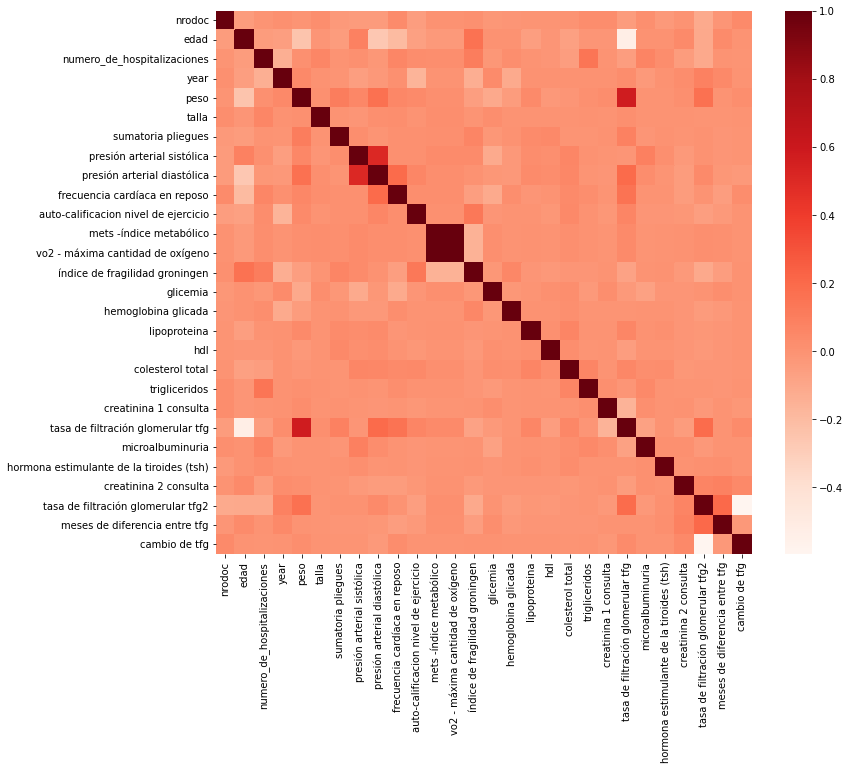

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cor_relevante_features, annot=False, cmap=plt.cm.Reds)
plt.show()

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

cols = list(union_all_factorized_features.columns)
count = len(union_all_factorized_features.columns)
c = 0 
for i in range(0,5):
  for j in range(0,5):
    if c < count: 
      #axs[i, j].plot(list(union_all_factorized_features[cols[c]].values) , list(union_all_factorized_features['numero_de_hospitalizaciones'].values) )
      sns.histplot(data=union_all_factorized_features, x=cols[c], kde=True, color="skyblue", ax=axs[i, j]).set(title=cols[c]) 
      axs[i, j].get_xaxis().set_visible(False)
      c = c + 1
plt.show()

In [113]:
#Paquetes
import plotly.express as  px
import numpy as np
import datetime

In [114]:
#Número de hospitaizaciones por edad
G1= union_all_factorized_features.groupby(['edad'], sort=True)[['numero_de_hospitalizaciones']].count().reset_index()
G1_1= G1.rename(columns={'numero_de_hospitalizaciones':'Frecuencia'})

In [116]:
#Gráfico
fig  =  px . bar ( G1_1,  x = 'edad' ,  y = 'Frecuencia', title='numero_de_hospitalizaciones por edad pre-pandemia') 
fig.update_layout(
    title_x = 0.5)
fig . show ()

In [ ]:
#Número de hospitalizaciones presión arterial diastólica

In [117]:
G2= union_all_factorized_features.groupby(['presión arterial diastólica'], sort=True)[['numero_de_hospitalizaciones']].count().reset_index()
G2_2= G2.rename(columns={'numero_de_hospitalizaciones':'Frecuencia'})

In [119]:
#Gráfico
fig  =  px . bar ( G2_2,  x = 'presión arterial diastólica' ,  y = 'Frecuencia', title='presión arterial diastólica pre-pandemia') 
fig.update_layout(
    title_x = 0.5)
fig . show ()

In [120]:
##Autocalificación de nivel de ejercicio de las personas hospitalizadas
G3= union_all_factorized_features.groupby(['auto-calificacion nivel de ejercicio'], sort=True)[['numero_de_hospitalizaciones']].count().reset_index()
G3_3= G3.rename(columns={'numero_de_hospitalizaciones':'Frecuencia'})


In [121]:
#Gráfico
fig  =  px . bar ( G3_3,  x = 'auto-calificacion nivel de ejercicio' ,  y = 'Frecuencia', title='Autocalificación de nivel de ejercicio de las personas hospitalizadas pre-pandemia') 
fig.update_layout(
    title_x = 0.5)
fig . show ()